In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### **Input Data:** từ file **`input.txt`**

In [2]:
def data():
    x = []
    y = []
    with open('input.txt','r+') as f:
            for line in f.readlines():
                xt = float(line.split(' ')[0])
                yt = float(line.split(' ')[1])
                check = True
                for x_check in x:
                    if x_check == xt:
                        check = False
                        break
                if check:
                    x.append(xt)
                    y.append(yt)
    x = np.asarray(x)
    y = np.asarray(y)
    n = len(x)-1
    return x,y,n

x,y,n = data()

##### **Function** Tính mảng giá trị $m$

In [3]:
def tinhM(x,y,n):
    m=np.empty(n+1)
    d=np.empty(n+1)
    anpha=np.empty(n+1)
    beta=np.empty(n+1)
    muy=np.empty(n+1)
    lamda=np.empty(n+1)
    h=np.diff(x)
    
    dh0=(y[1]-y[0])/(x[1]-x[0])
    dhn=(y[n]-y[n-1])/(x[n]-x[n-1])
    d[0]=6/h[0]*((y[1]-y[0])/h[0]-dh0)
    d[n]=6/h[n-1]*(dhn-(y[n]-y[n-1])/h[n-1])
    anpha[1]=1/(-2)
    beta[1]=d[0]/2
    for i in range(1,n):
        d[i]=6*((y[i+1]-y[i])/h[i]-(y[i]-y[i-1])/h[i-1])/(h[i]+h[i-1])
    for i in range(1,n):
        muy[i]=h[i-1]/(h[i-1]+h[i])
        lamda[i]=h[i]/(h[i-1]+h[i])
    for i in range(1,n):
        anpha[i+1]=lamda[i]/(-2-anpha[i]*muy[i])
        beta[i+1]=(muy[i]*beta[i]-d[i])/(-2-anpha[i]*muy[i])
    m[n]=(1*beta[n]-d[n])/(-2-1*anpha[n])
    for i in range(n-1,-1,-1):
        m[i]=anpha[i+1]*m[i+1]+beta[i+1]
    return m

##### Xây dựng hàm **Spline bậc 3**

In [18]:
def spline3(k,x0):
    h = np.diff(x)
    m = tinhM(x,y,n)
    if k==1:
        for j in range(1,n+1):
            print('S3' +'['+ str(x[j-1])+','+str(x[j])+']'+' = ' 
                    + str(round(m[j - 1] / (6 * h[j - 1]),3)) + '(' + str(x[j]) + ' - x)^3' +
                  '+ ' + str(round(m[j] / (h[j - 1] * 6),3)) + '(x-' + str(x[j - 1]) + ')^3' +
                  '+ ' + str(round((1 / h[j - 1]) * (y[j - 1] - m[j - 1] / 6 * h[j - 1] ** 2),3)) + '(' + str(x[j]) + '-x)' +
                  '+ ' + str(round((y[j] - (m[j] / 6) * h[j - 1] ** 2) / h[j - 1],3)) + '(x-' + str(x[j - 1]) + ')')
    for i in range(1,n+1):
        if x[i-1]<=x0 and x0<=x[i]:
            s3=m[i-1]/(6*h[i-1])*(x[i]-x0)**3+m[i]/(h[i-1]*6)*(x0-x[i-1])**3+(1/h[i-1])*(y[i-1]-m[i-1]/6*h[i-1]**2)*(x[i]-x0) +(y[i]-(m[i]/6)*h[i-1]**2)*(x0-x[i-1])/h[i-1]
    return s3

In [19]:
print("========================================================================================")
print("Cac da thuc spline bac 3")
spline3(1,x[0])

Cac da thuc spline bac 3
S3[0.0,0.52] = 0.097(0.52 - x)^3+ -0.194(x-0.0)^3+ -0.026(0.52-x)+ 1.014(x-0.0)
S3[0.52,1.05] = -0.19(1.05 - x)^3+ -0.277(x-0.52)^3+ 0.997(1.05-x)+ 1.719(x-0.52)
S3[1.05,1.57] = -0.282(1.57 - x)^3+ -0.32(x-1.05)^3+ 1.749(1.57-x)+ 2.01(x-1.05)
S3[1.57,2.09] = -0.32(2.09 - x)^3+ -0.288(x-1.57)^3+ 2.01(2.09-x)+ 1.751(x-1.57)
S3[2.09,2.62] = -0.283(2.62 - x)^3+ -0.168(x-2.09)^3+ 1.721(2.62-x)+ 0.99(x-2.09)
S3[2.62,3.14] = -0.171(3.14 - x)^3+ 0.009(x-2.62)^3+ 1.008(3.14-x)+ -0.002(x-2.62)
S3[3.14,3.66] = 0.009(3.66 - x)^3+ 0.135(x-3.14)^3+ -0.002(3.66-x)+ -0.998(x-3.14)
S3[3.66,4.17] = 0.137(4.17 - x)^3+ 0.344(x-3.66)^3+ -1.016(4.17-x)+ -1.795(x-3.66)
S3[4.17,4.71] = 0.325(4.71 - x)^3+ 0.277(x-4.17)^3+ -1.706(4.71-x)+ -1.933(x-4.17)
S3[4.71,5.23] = 0.288(5.23 - x)^3+ 0.291(x-4.71)^3+ -2.001(5.23-x)+ -1.752(x-4.71)
S3[5.23,5.76] = 0.285(5.76 - x)^3+ 0.188(x-5.23)^3+ -1.722(5.76-x)+ -0.996(x-5.23)
S3[5.76,6.28] = 0.192(6.28 - x)^3+ -0.096(x-5.76)^3+ -1.013(6.28-x)+ 0.

0.0

##### Xây dựng hàm **Spline bậc 1**

In [5]:
def spline1(k,x0):
    h = np.diff(x)
    if k==1:
        for i in range(1,n+1):
            print('S1'+'['+str(x[i-1])+', '+str(x[i])+']='+str(round(y[i-1]/h[i-1],3))+'('+str(x[i])+'-x)'+'+'+str(round(y[i]/h[i-1],3))+'(x-'+str(x[i-1])+')')
    for i in range(1,n+1):
        if x[i-1]<=x0 and x0<=x[i]:
            s1=y[i-1]/h[i-1]*(x[i]-x0)+y[i]/h[i-1]*(x0-x[i-1])
    return s1


In [ ]:
print("========================================================================================")
print("Cac da thuc spline bac 1:")
spline1(1,x[0])

##### Xây dựng hàm **Spline bậc 2**

In [6]:
def spline2(k,x0):
    h = np.diff(x)
    m = np.empty(n+1)
    m[0]=(y[1]-y[0])/h[0]
    for i in range(1,n+1):
        m[i]=2/h[i-1]*(y[i]-y[i-1])-m[i-1]
    if k==1:
        for i in range(1,n+1):
            print('S2'+'['+str(x[i-1])+', '+str(x[i])+']='+str(round(-m[i-1]/2/h[i-1],3))+'('+str(x[i])+'-x)^2+'+str(round(m[i]/2/h[i-1],3))+'(x-'+str(x[i-1])+')^2'+'+'+str(round(y[i]-m[i]/2*h[i-1],3)))
    for i in range(1,n+1):
        if x[i-1]<=x0 and x0<=x[i]:
            s2=-m[i-1]/2/h[i-1]*(x[i]-x0)**2+m[i]/2/h[i-1]*(x0-x[i-1])**2+y[i]-m[i]/2*h[i-1]
    return s2

In [ ]:

print("========================================================================================")
print("Cac da thuc spline bac 2")
spline2(1,x[0])

### ***Vẽ đồ thị***

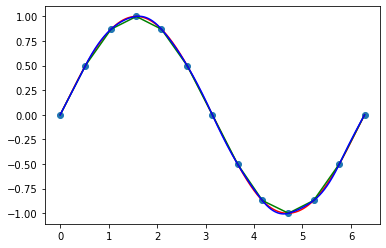

In [8]:

x0=np.linspace(x[0], x[n], 1000)
y3=[]
y1=[]
y2=[]
for i in x0:
  y3.append(spline3(0,i))
  y1.append(spline1(0,i))
  y2.append(spline2(0,i))
plt.plot(x0,y3,'red')
plt.plot(x0,y1,'green')
plt.plot(x0,y2,'blue')
plt.scatter(x,y)
plt.show()